In [1]:
import pandas as pd
df_categories = pd.read_csv('/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_categories.csv')
df_products = pd.read_csv('/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_products.csv')

df_categories.head()

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [2]:
df_products.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [3]:
merged_df = pd.merge(
    left=df_products,      # Sol tablo: Ürünler
    right=df_categories,   # Sağ tablo: Kategoriler
    left_on='category_id', # Sol tablodaki birleştirme anahtarı
    right_on='id',         # Sağ tablodaki birleştirme anahtarı
    how='left'             # Ürünler tablosundaki tüm kayıtları koru
)

# İstenen sütunları seçerek yeni bir DataFrame oluşturma
# Birleştirilmiş tablodan sadece 'title', 'category_id' ve 'category_name' sütunlarını alıyoruz.
final_df = merged_df[['title', 'category_id', 'category_name']]

# Oluşturulan yeni DataFrame
final_df.head()

,title,category_id,category_name
0,"Sion Softside Expandable Roller Luggage, Black...",104,Suitcases
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,104,Suitcases
2,Platinum Elite Softside Expandable Checked Lug...,104,Suitcases
3,Freeform Hardside Expandable with Double Spinn...,104,Suitcases
4,Winfield 2 Hardside Expandable Luggage with Sp...,104,Suitcases


In [4]:
shuffled_df = final_df.sample(frac=1)
shuffled_df.head()

,title,category_id,category_name
1188899,Women's Bootie Ankle Boot,122,Women's Shoes
1038460,"Craftsman 200, Safety Glass, Comfort Fit - Cl...",152,Occupational Health & Safety Products
1344990,NewJeans - 2nd EP Get Up [Bunny Beach Bag ver....,5,Scrapbooking & Stamping Supplies
989752,"Greenlee 37156 Hole Saw Arbor, Black, 0.5",153,Cutting Tools
1175467,Crosswords DS (Renewed),242,"Nintendo DS Games, Consoles & Accessories"


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df = shuffled_df.dropna(subset=['title'])

print("--- 1. TEMEL BİLGİLER ---")
print(f"DataFrame'de toplam {df.shape[0]} satır (ürün) ve {df.shape[1]} sütun bulunmaktadır.")
print("\n Eksik Değer Kontrolü:")
print(df.isnull().sum())

--- 1. TEMEL BİLGİLER ---
DataFrame'de toplam 1426336 satır (ürün) ve 3 sütun bulunmaktadır.

 Eksik Değer Kontrolü:
title            0
category_id      0
category_name    0
dtype: int64


In [6]:
# Toplam benzersiz kategori sayısını bulalım
num_categories = df['category_name'].nunique()
print(f"Toplam benzersiz kategori sayısı: {num_categories}")

Toplam benzersiz kategori sayısı: 248


In [7]:
# Her kategorideki ürün sayısını hesaplayalım (value_counts)
category_counts = df['category_name'].value_counts()
print(category_counts)

category_name
Girls' Clothing                                   28619
Boys' Clothing                                    24660
Toys & Games                                      20846
Men's Shoes                                       19822
Women's Handbags                                  18994
                                                  ...  
Smart Home: Lawn and Garden                          76
Smart Home: Voice Assistants and Hubs                50
Smart Home: New Smart Devices                        42
Garment Bags                                         40
Smart Home Thermostats - Compatibility Checker       22
Name: count, Length: 248, dtype: int64


In [8]:
print("\nEn Yaygın 15 Kategori:")
print(category_counts.head(15))


En Yaygın 15 Kategori:
category_name
Girls' Clothing                28619
Boys' Clothing                 24660
Toys & Games                   20846
Men's Shoes                    19822
Women's Handbags               18994
Girls' Jewelry                 18514
Men's Clothing                 18258
Men's Accessories              17679
Women's Clothing               17393
Women's Jewelry                17005
Travel Accessories             16160
Women's Shoes                  15626
Home Storage & Organization    15437
Women's Accessories            13921
Men's Watches                  12839
Name: count, dtype: int64


In [9]:
print(category_counts.tail(15))

category_name
Automotive Enthusiast Merchandise                 253
Smart Home: WiFi and Networking                   234
Smart Home: Plugs and Outlets                     226
Smart Home: Home Entertainment                    176
Luggage Sets                                      149
Smart Home: Lighting                              141
Smart Home: Other Solutions                       140
Gift Cards                                        139
Online Video Game Services                         94
Smart Home: Vacuums and Mops                       78
Smart Home: Lawn and Garden                        76
Smart Home: Voice Assistants and Hubs              50
Smart Home: New Smart Devices                      42
Garment Bags                                       40
Smart Home Thermostats - Compatibility Checker     22
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


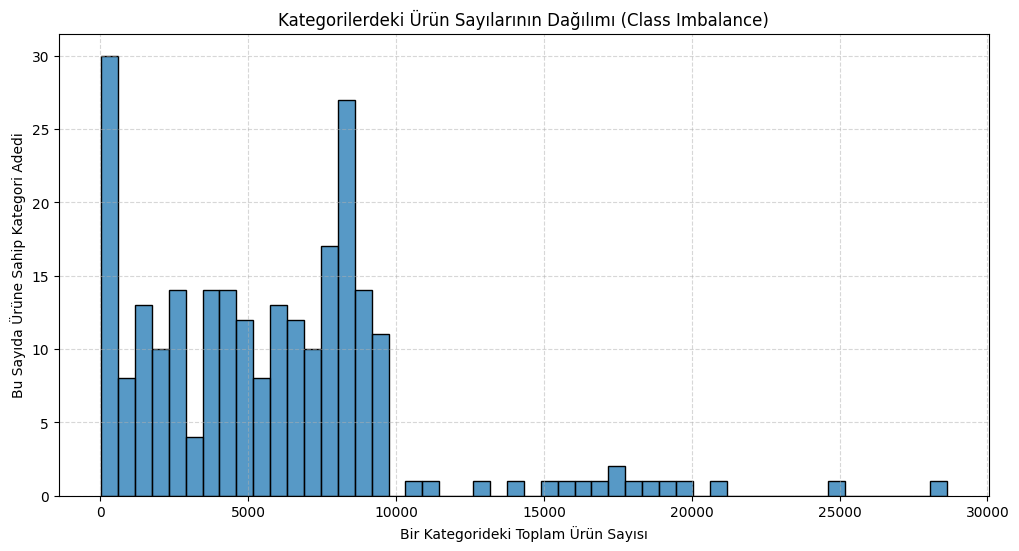

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data=category_counts, bins=50) # Y ekseni logaritmik
plt.title('Kategorilerdeki Ürün Sayılarının Dağılımı (Class Imbalance)')
plt.xlabel('Bir Kategorideki Toplam Ürün Sayısı')
plt.ylabel('Bu Sayıda Ürüne Sahip Kategori Adedi')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# Bir Kategorideki Toplam Ürün Sayısı

- Görüldüğü üzere veri setinin kategori-ürün sayısı dağılımı oldukça dengesiz. Bu eğiteceğimiz modelin veri sayısı çok olan kategorileri öğrenirken düşük ürün sayısına sahip kategorileri es geçmesine sebep olabilir. 

--- Kategori Başına 1000 ile 2000 Arasında Ürüne Sahip Kategoriler ---
category_name
Household Supplies                                  1942
Car Electronics & Accessories                       1931
Finger Toys                                         1883
Kids' Home Store                                    1870
Rain Umbrellas                                      1774
Electronic Components                               1759
Tools & Home Improvement                            1719
Travel Tote Bags                                    1716
Puppets & Puppet Theaters                           1655
Baby Stationery                                     1651
Legacy Systems                                      1488
Mac Games & Accessories                             1477
Oils & Fluids                                       1458
Toilet Training Products                            1403
Slot Cars, Race Tracks & Accessories                1366
Pregnancy & Maternity Products                      1343
Per

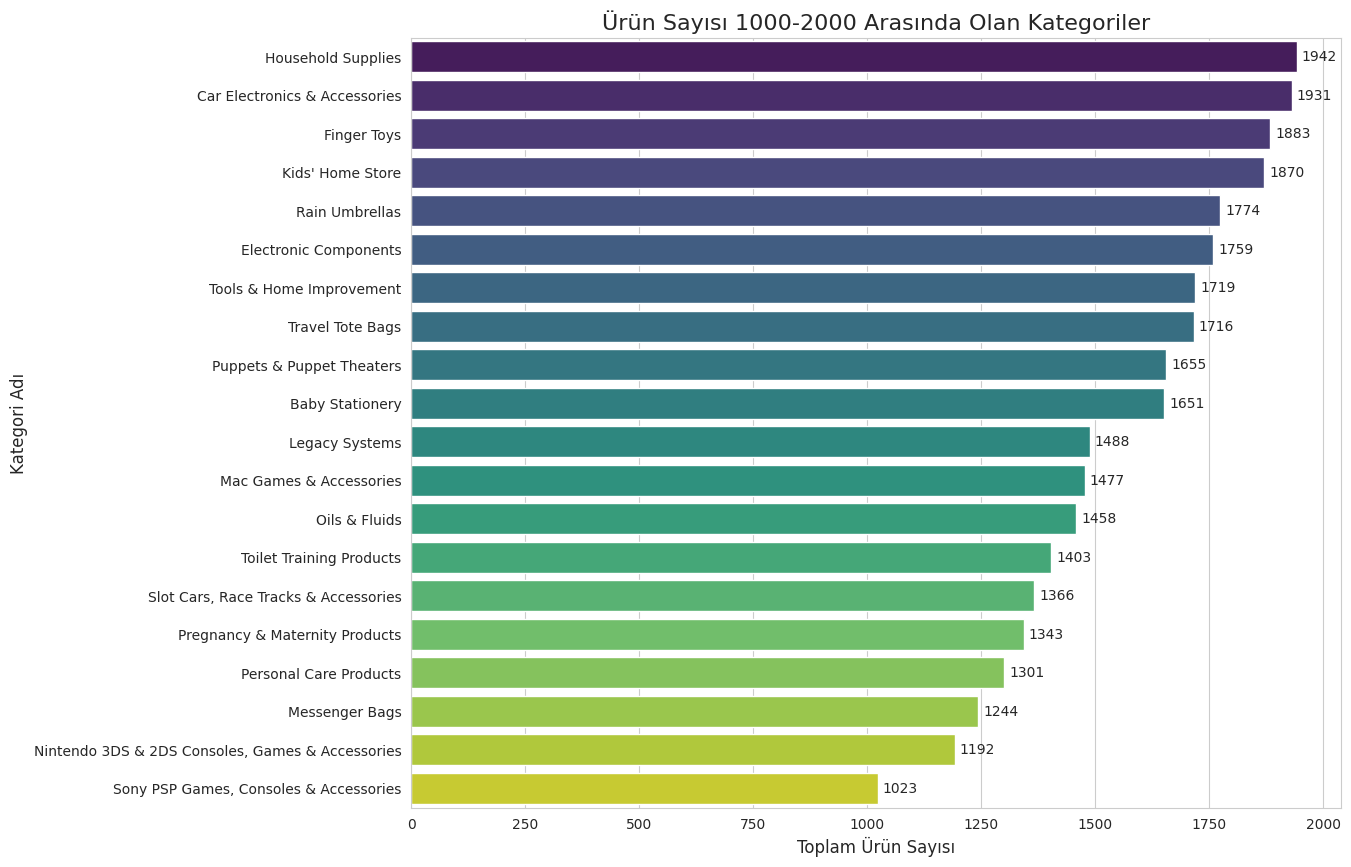

In [30]:
kategoriler_1000_2000_arasi = category_counts[category_counts.between(1000, 2000)]
print("--- Kategori Başına 1000 ile 2000 Arasında Ürüne Sahip Kategoriler ---")
print(kategoriler_1000_2000_arasi)

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid") 
grafik = sns.barplot(
    x=kategoriler_1000_2000_arasi.values,
    y=kategoriler_1000_2000_arasi.index,
    palette='viridis'
)

plt.title('Ürün Sayısı 1000-2000 Arasında Olan Kategoriler', fontsize=16)
plt.xlabel('Toplam Ürün Sayısı', fontsize=12)
plt.ylabel('Kategori Adı', fontsize=12)
for p in grafik.patches:
    width = p.get_width()
    plt.text(width + 50, 
             p.get_y() + p.get_height() / 2, 
             '{:1.0f}'.format(width), 
             ha='center', va='center')
plt.show()

# İzlenecek Strateji
- Task yönergesinde 1000-3000 arası satır ile çalışılmalı şeklinde belirtilmiş.
- Ancak TF-IDF ile vektörleştirme yapacağımız için yaklaşık 250 farklı kategorimiz ve çok yüksek sayıda ürünümüzün olması kararsız ve anlamsız sonuçlar çıkarabilir.
- Bu sebeple ben satır sayısını biraz arttırma (kategori başına 600) ve yalnızca 10 kategoride tahminleme modelimizi geliştirme yolunu izleyeceğim.
- Her ne kadar kullanılacak satır sayısını 6000'e çıkarsak da kategorilerin çok spesifik olması (250 adet farklı kategoriye sahip bir dataset kullanmış olmamız) modelin performasında anlamsızlıklar oluşturabilir.
- 1000 ile 2000 ürün sayısı olan kategorileri listeleyip bunların arasından 10 tane seçiyorum.
- Her kategoriden 600 adet ürün alarak dengeli bir dataframe oluşturuyorum.
- Ayrıca bu dataframe'e shuffle işlemi uygulayarak train ve test setlerimizin her kategoriden ürünler içermesini sağlayacağız.

In [20]:
# 1. Adım: Hedef kategorileri bir liste olarak tanımlayalım
target_categories = [
    'Baby Stationery',
    'Legacy Systems',
    'Mac Games & Accessories',
    'Oils & Fluids',
    'Toilet Training Products',
    'Slot Cars, Race Tracks & Accessories',
    'Pregnancy & Maternity Products',
    'Personal Care Products',
    'Messenger Bags',
    'Nintendo 3DS & 2DS Consoles, Games & Accessories'
]

In [21]:
# 2. Adım: Ana DataFrame'i sadece bu kategorileri içerecek şekilde filtreleyelim
filtered_df = df[df['category_name'].isin(target_categories)].copy()

In [22]:
# 3. Adım: Kategorilere göre gruplayıp her gruptan 600 rastgele örnek seçelim
balanced_df = filtered_df.groupby('category_name').sample(n=600, random_state=42)

In [23]:
print(f"Toplam Satır Sayısı: {balanced_df.shape[0]}")
print(f"Toplam Sütun Sayısı: {balanced_df.shape[1]}")

Toplam Satır Sayısı: 6000
Toplam Sütun Sayısı: 3


In [24]:
print(balanced_df['category_name'].value_counts())

category_name
Baby Stationery                                     600
Legacy Systems                                      600
Mac Games & Accessories                             600
Messenger Bags                                      600
Nintendo 3DS & 2DS Consoles, Games & Accessories    600
Oils & Fluids                                       600
Personal Care Products                              600
Pregnancy & Maternity Products                      600
Slot Cars, Race Tracks & Accessories                600
Toilet Training Products                            600
Name: count, dtype: int64


In [25]:
print("\n--- Yeni DataFrame'den Örnekler ---")
balanced_df.head()


--- Yeni DataFrame'den Örnekler ---


,title,category_id,category_name
368278,Set of 30 BBQ Baby Shower Invitations-Diaper R...,40,Baby Stationery
367732,50 Books for Baby Request Insert Card for Boy ...,40,Baby Stationery
367978,48 Wishes For Baby Cards (Cute Bear),40,Baby Stationery
367150,50 Pieces Greenery Diaper Raffle Tickets For B...,40,Baby Stationery
368174,Don't Say Baby Clothespin Game Sign (1 Sign + ...,40,Baby Stationery


In [29]:
shuffled_balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(shuffled_balanced_df.head())

                                               title  category_id  \
0                               Ratatouille - PC/Mac          248   
1  OKAY SHEA BUTTER JAR WHITE 13oz weight (16oz j...           52   
2  Fox Baby Shower Thank You Cards Woodland Fores...           40   
3    Factual Upcycled Canvas & Cowhide Messenger Bag          100   
4  Boley Dinosaur Adventure Road Creators Playset...          240   

                          category_name  
0               Mac Games & Accessories  
1                Personal Care Products  
2                       Baby Stationery  
3                        Messenger Bags  
4  Slot Cars, Race Tracks & Accessories  


In [31]:
output_path = '/kaggle/working/balanced_shuffled_products.csv'
shuffled_balanced_df.to_csv(output_path, index=False)
